In [1]:
import numpy as np
import pandas as pd
import gudhi

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib.collections import PatchCollection
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics



from pogo import Pogo

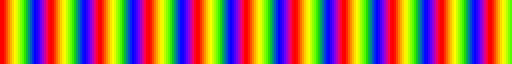

In [2]:
%matplotlib inline

cmap = plt.cm.get_cmap("prism").copy()
#cmap.set_bad(cmap(0))

cmap.set_under('white')
cmap.set_over('white')
cmap.set_bad("black")
#cmap(number_of_clusters)

cm.get_cmap(cmap)

#randomized blobs with standard deviation
n = 6
std = np.random.random_sample((n,))
#std = 1
X, y, z = make_blobs(
    n_samples=n*100,
    n_features=2,
    centers=n,
    cluster_std=std,
    center_box=(-10.0, 10.0),
    shuffle=False,
    random_state=42,
    return_centers=True,
)



size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [3]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.zeros(n_samples,dtype='int')

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [4]:
X=varied[0]
y=varied[1]
filename = 'varied'


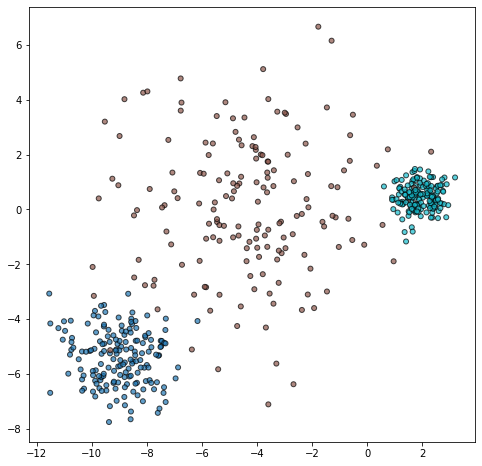

In [5]:
size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [6]:
pogo = Pogo(overlapping=True)
pogo.fit(X)

In [7]:
pogo.labels_

array([  1,   1,   5,   1,  12,   5,   1,  -1,  12,  12,  -1,  12,   1,
        12, 130,   1,   5,   1,   1,   5,   1,   5,  12,   5,   5,   5,
         1,   5,   5,   1,  12,   1,   1,  -1,   5,  12,   5,   5,   5,
        12,   5,   5,   1,  12,  12,   1,  12,   1,   1,   1,   1,   5,
        12,   5,   1,  12,   1,   1,  12,   1,  12,   1,   1,   5,  -1,
        12,   1,   1,   5,   5,   5,  12,   1,  12,   1,   5,   1,   1,
         5,   1,  12,   5,   1,   5,   1,   1,   1,   1,   1,   5,  12,
         5,  12,  12,  12,   5,  12,  12,  12,   1,  12,   1,   1,   1,
         1,  12,   1,   5,   5,   5,   5,   1,   1,   1,   5,  12,   1,
        -1,  12,  12,  12,  97,   5,   5,  12,  12,   5,   1,   1,  -1,
        12,   5,   1,  12,   1,  12,  12,   1,  12,   1,   5,   1,  12,
         5,   5,   5,   1,  12,  12,   5,   1,   5,  12,  12,   1,  12,
        12,  12,   1,   1,   5,  12,   5,  12,   1,   1,  12,   5,   1,
        12,  12,   1,   5,   1,   1,  12,  12,  12,   1,   5,  1

In [8]:
y_pred = pogo.labels_.astype(int)


In [9]:
y_pred

array([  1,   1,   5,   1,  12,   5,   1,  -1,  12,  12,  -1,  12,   1,
        12, 130,   1,   5,   1,   1,   5,   1,   5,  12,   5,   5,   5,
         1,   5,   5,   1,  12,   1,   1,  -1,   5,  12,   5,   5,   5,
        12,   5,   5,   1,  12,  12,   1,  12,   1,   1,   1,   1,   5,
        12,   5,   1,  12,   1,   1,  12,   1,  12,   1,   1,   5,  -1,
        12,   1,   1,   5,   5,   5,  12,   1,  12,   1,   5,   1,   1,
         5,   1,  12,   5,   1,   5,   1,   1,   1,   1,   1,   5,  12,
         5,  12,  12,  12,   5,  12,  12,  12,   1,  12,   1,   1,   1,
         1,  12,   1,   5,   5,   5,   5,   1,   1,   1,   5,  12,   1,
        -1,  12,  12,  12,  97,   5,   5,  12,  12,   5,   1,   1,  -1,
        12,   5,   1,  12,   1,  12,  12,   1,  12,   1,   5,   1,  12,
         5,   5,   5,   1,  12,  12,   5,   1,   5,  12,  12,   1,  12,
        12,  12,   1,   1,   5,  12,   5,  12,   1,   1,  12,   5,   1,
        12,  12,   1,   5,   1,   1,  12,  12,  12,   1,   5,  1

In [10]:
pogo.cluster_dict_list_[pogo.idx_]

{0: 1,
 1: 1,
 2: 5,
 3: 1,
 4: 12,
 5: 5,
 6: 1,
 7: -1,
 8: 12,
 9: 12,
 10: -1,
 11: 12,
 12: 1,
 13: 12,
 14: 130,
 15: 1,
 16: 5,
 17: 1,
 18: 1,
 19: 5,
 20: 1,
 21: 5,
 22: 12,
 23: 5,
 24: 5,
 25: 5,
 26: 1,
 27: 5,
 28: 5,
 29: 1,
 30: 12,
 31: 1,
 32: 1,
 33: -1,
 34: 5,
 35: 12,
 36: 5,
 37: 5,
 38: 5,
 39: 12,
 40: 5,
 41: 5,
 42: 1,
 43: 12,
 44: 12,
 45: 1,
 46: 12,
 47: 1,
 48: 1,
 49: 1,
 50: 1,
 51: 5,
 52: 12,
 53: 5,
 54: 1,
 55: 12,
 56: 1,
 57: 1,
 58: 12,
 59: 1,
 60: 12,
 61: 1,
 62: 1,
 63: 5,
 64: -1,
 65: 12,
 66: 1,
 67: 1,
 68: 5,
 69: 5,
 70: 5,
 71: 12,
 72: 1,
 73: 12,
 74: 1,
 75: 5,
 76: 1,
 77: 1,
 78: 5,
 79: 1,
 80: 12,
 81: 5,
 82: 1,
 83: 5,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 5,
 90: 12,
 91: 5,
 92: 12,
 93: 12,
 94: 12,
 95: 5,
 96: 12,
 97: 12,
 98: 12,
 99: 1,
 100: 12,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 12,
 106: 1,
 107: 5,
 108: 5,
 109: 5,
 110: 5,
 111: 1,
 112: 1,
 113: 1,
 114: 5,
 115: 12,
 116: 1,
 117: -1,
 118: 12,
 

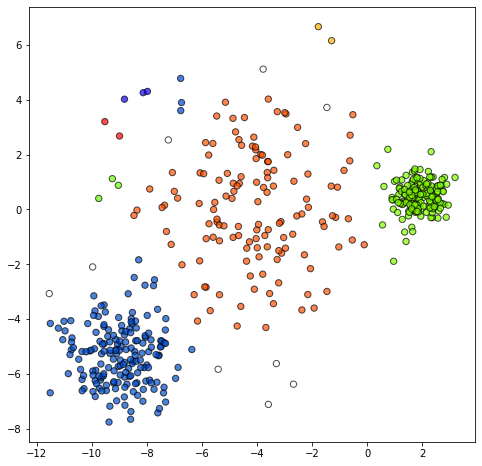

In [11]:
pogo.plot_diagram()

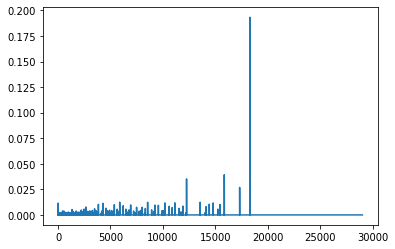

In [12]:
plt.plot(pogo.gap_vector_)

In [13]:
pogo.initial_idx_

18297

In [14]:
print(pogo.cluster_dict_list_[pogo.initial_idx_].values())

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

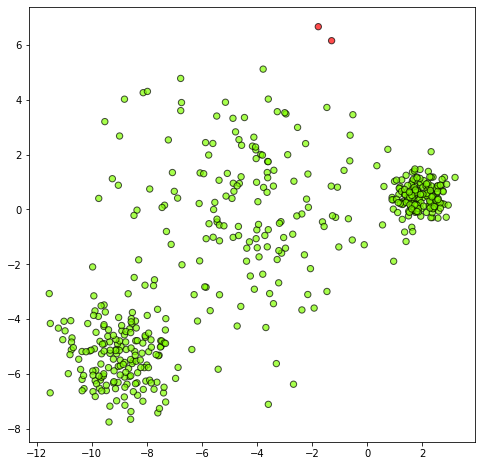

In [15]:
pogo.plot_diagram(plot_idx = pogo.candidates_[pogo.initial_idx_])

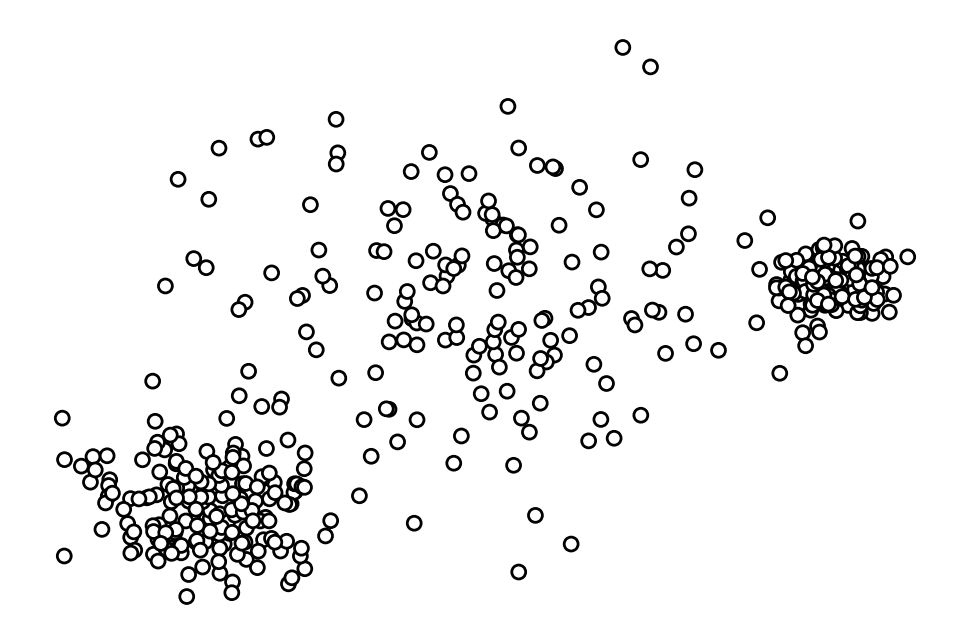

In [16]:
pogo.animate_pogo()

In [17]:
pogo.confidence_

'0.9%'

In [18]:
pogo.idx_

11921

In [19]:
pogo.candidates_[:20]

array([18297, 15860, 12260, 17325, 13559,  5883,  8546, 11139, 10186,
       14797,     2,  4283, 14427,  3849, 15453,  5369,  6926,  9244,
        9570,  6221])

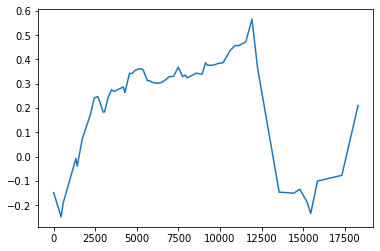

In [20]:
silhouete_indices, silhouette_array = pogo.plot_silhouette_score(60)

In [21]:
silhouette_array

array([-0.1476594 , -0.24759603, -0.19092985, -0.00738045, -0.03933712,
        0.0753406 ,  0.17398071,  0.24254832,  0.24425307,  0.24705744,
        0.18342599,  0.18412631,  0.24302003,  0.27584039,  0.26824133,
        0.27535326,  0.28707647,  0.26406531,  0.34274478,  0.34252701,
        0.35601481,  0.36112815,  0.36150222,  0.3585573 ,  0.31228577,
        0.31264207,  0.30654507,  0.30221103,  0.30461018,  0.3190373 ,
        0.32896638,  0.33058115,  0.36889395,  0.3299621 ,  0.33610318,
        0.32440068,  0.3347471 ,  0.34357975,  0.33962225,  0.3867154 ,
        0.37629752,  0.37633556,  0.38415584,  0.38493991,  0.3866727 ,
        0.43557833,  0.45716147,  0.45702861,  0.47214075,  0.56545108,
        0.36443736, -0.14606507, -0.14797337, -0.15058144, -0.13384926,
       -0.18622706, -0.23364298, -0.10014622, -0.07645297,  0.2100633 ])

(array([    2,  3849,  4283,  5369,  5883,  6221,  6926,  8546,  9244,
         9570, 10186, 11139, 12260, 13559, 14427, 14797, 15453, 15860,
        17325, 18297]),
 array([3.07687146e-04, 7.23296320e-01, 7.30392428e-01, 7.40551379e-01,
        7.73266451e-01, 7.73775955e-01, 7.71005812e-01, 7.81564705e-01,
        7.98044200e-01, 7.95133199e-01, 8.00760335e-01, 8.16621243e-01,
        5.26540115e-01, 2.79761820e-03, 2.74359045e-03, 1.90909234e-03,
        1.94212123e-03, 8.83782719e-04, 1.86474120e-04, 1.61930942e-05]))

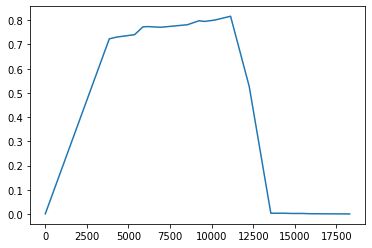

In [22]:
pogo.plot_rand_score(20,y)

In [23]:
pogo.silhouette_array_

array([-0.00738045,  0.17398071,  0.24254832,  0.24425307,  0.24705744,
        0.27584039,  0.27535326,  0.26406531,  0.34274478,  0.3585573 ,
        0.31228577,  0.30654507,  0.30221103,  0.30461018,  0.3190373 ,
        0.32896638,  0.36889395,  0.32440068,  0.3347471 ,  0.34357975,
        0.33962225,  0.37629752,  0.37633556,  0.3866727 ,  0.43557833,
        0.45716147,  0.45702861,  0.47214075,  0.56545108,  0.36443736,
       -0.14606507, -0.14797337, -0.15058144, -0.13384926, -0.18622706,
       -0.23364298, -0.10014622, -0.07645297,  0.2100633 ])

In [24]:
pogo.idx_array_[pogo.silhouette_array_.argmax()]

11921

In [25]:
#silhouette reduce loop
current_silhouette_max = metrics.silhouette_score(X, np.array(list(pogo.cluster_dict_list_[pogo.candidates_[0]].values())), metric="euclidean")

for i in range(len(pogo.candidates_)):
    print(pogo.candidates_[i])
    print(current_silhouette_max)
    print(metrics.silhouette_score(X, np.array(list(pogo.cluster_dict_list_[pogo.candidates_[i]].values())), metric="euclidean"))

    while metrics.silhouette_score(X, np.array(list(pogo.cluster_dict_list_[pogo.candidates_[i]].values())), metric="euclidean") > metrics.silhouette_score(X, np.array(list(pogo.cluster_dict_list_[i].values())), metric="euclidean"):
        print(i)
        print(metrics.silhouette_score(X, np.array(list(pogo.cluster_dict_list_[pogo.candidates_[i]].values())), metric="euclidean"))
        idx = pogo.candidates_[i+1]

18297
0.21006329907216478
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.2100

0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478
0
0.21006329907216478


KeyboardInterrupt: 

In [ ]:
true = y

print(metrics.adjusted_rand_score(true, pred))
print(metrics.silhouette_score(X, pred, metric="sqeuclidean"))

In [ ]:
diag = pogo.simplex_tree_.persistence()
gudhi.plot_persistence_barcode(diag)
plt.show()

In [ ]:
pogo.simplex_tree_.num_simplices()

In [ ]:
#check that all clusters have merged
len(np.unique(pogo.candidates_[-1]))

In [ ]:
print(pogo.cluster_dict_list_[-2].values()) #penultimate clustering has 2 clusters
print(pogo.cluster_dict_list_[-1].values()) #last clustering finally merges to all one cluster

In [ ]:

print('your dataset appears to have', pogo.n_clusters_,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

In [ ]:
print(pogo.idx_)

In [ ]:
print(pogo.initial_idx_)